In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


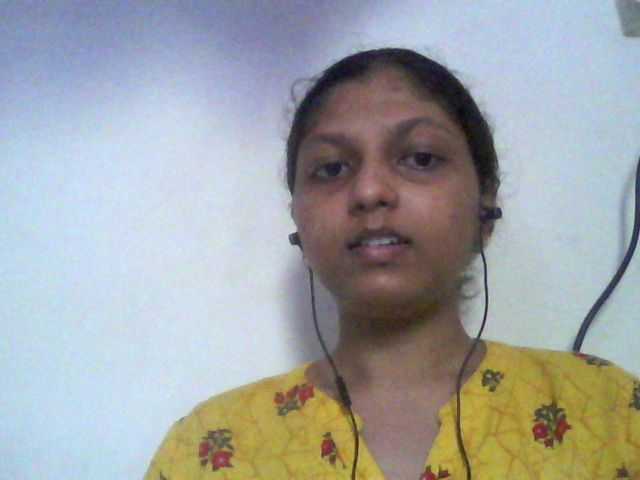

In [3]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Using haar cascade


In [ ]:
# img = cv2.imread("/content/sad-faces-funny-faces.jpg")
# a = detector.detect_emotions(img)

In [7]:
pip install FER

     |████████████████████████████████| 808kB 3.5MB/s 
     |████████████████████████████████| 2.3MB 16.8MB/s 
  Created wheel for FER: filename=fer-20.0.0-cp36-none-any.whl size=809669 sha256=437f21b0f627df5bce44cc80bc385fe68b34c80bcd9bf9b2e5c72186b0541c5f
  Stored in directory: /root/.cache/pip/wheels/6d/e1/94/0bfbdc9d3f376b9f116d5490f2cc8695f7a1d66dbf404a10a5
Successfully built FER


In [8]:
from gtts import gTTS 
from IPython.display import Audio 
from fer import FER
detector = FER(mtcnn=True)
def Speak():
  img = cv2.imread("photo.jpg")
  emotion, score = detector.top_emotion(img)
  scores = score * 100  
  tts = gTTS('Hello, according to my analysis you look {} percent {}'.format(int(scores),emotion)) 
  tts.save('1.wav') 
  sound_file = '1.wav'
  return Audio(sound_file, autoplay=True)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


04-09-2020:06:49:59,135 WARNING  [deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2070: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [9]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('/content/haarcascade_smile.xml')

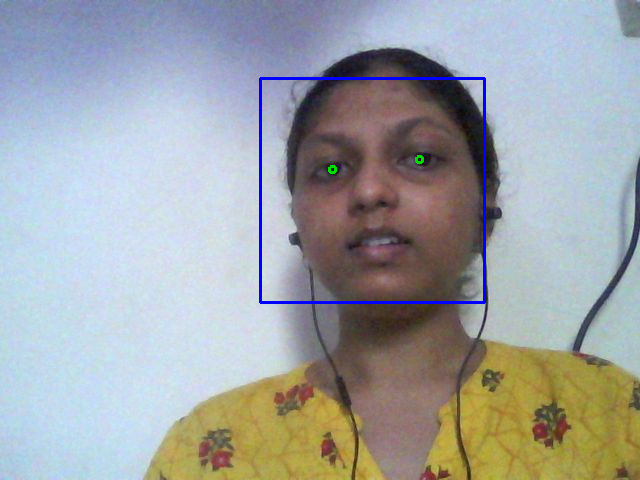

In [10]:
import numpy
image = cv2.imread("/content/photo.jpg")


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 10)
    irises = []
    for (ex,ey,ew,eh) in eyes:
        iris_w = int(ex + float(ew / 2))
        iris_h = int(ey + float(eh / 2))
        cv2.circle( roi_color, (iris_w+1,iris_h+1),3,(0,222,0),2 )
        # cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        # irises.append([numpy.float32(iris_w), numpy.float32(iris_h)])

    for (sx, sy, sw, sh) in smiles:
      cv2.rectangle(roi_color, (sx,sy), (sx+sw,sy+sh), (0,255,255),2)


from google.colab.patches import cv2_imshow


cv2_imshow(image)
 

cv2.destroyAllWindows()


Speak()
